In [ ]:
!pip install tensorflow tensorflow-model-analysis fairness-indicators

In [ ]:
import tensorflow as tf
import tensorflow_model_analysis as tfma


In [ ]:
eval_config = tfma.EvalConfig()
print("Setup successful!")


Setup successful!


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving adult.data to adult.data


In [ ]:
import pandas as pd

df = pd.read_csv('adult.data')

# Display the first few rows of the dataset
print(df.head())


   39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K 

In [ ]:
df.isnull().sum()  # This shows the number of missing values in each column


,0
39,0
State-gov,0
77516,0
Bachelors,0
13,0
Never-married,0
Adm-clerical,0
Not-in-family,0
White,0
Male,0


In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
           "hours-per-week", "native-country", "income"]


In [ ]:
import pandas as pd

df = pd.read_csv("adult.data", names=columns, sep=",", skipinitialspace=True)

# Display the first few rows
print(df.head())


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [ ]:
# Features (all columns except 'income')
X = df.drop(columns="income")

# Labels (target column 'income')
y = df["income"]


In [ ]:
# Check distribution of 'sex' attribute
print("Sex Distribution:")
print(df["sex"].value_counts())

# Check distribution of 'race' attribute
print("\nRace Distribution:")
print(df["race"].value_counts())


Sex Distribution:
Male      21790
Female    10771
Name: sex, dtype: int64

Race Distribution:
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


In [ ]:
print("\nMissing Values per Column:")
print(df.isnull().sum())



Missing Values per Column:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [ ]:
!pip install seaborn matplotlib


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


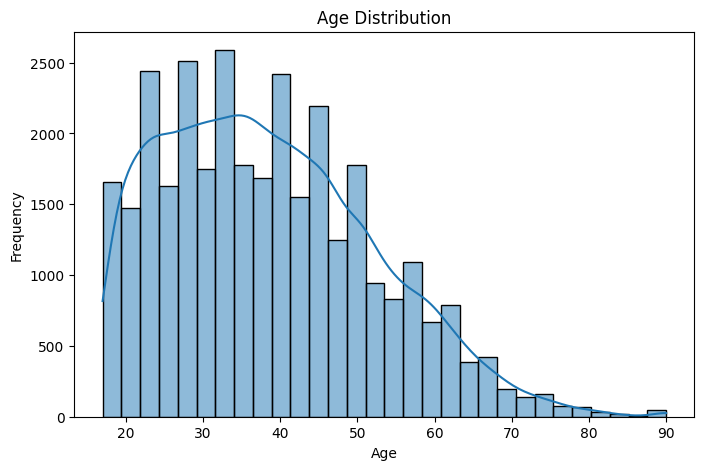

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


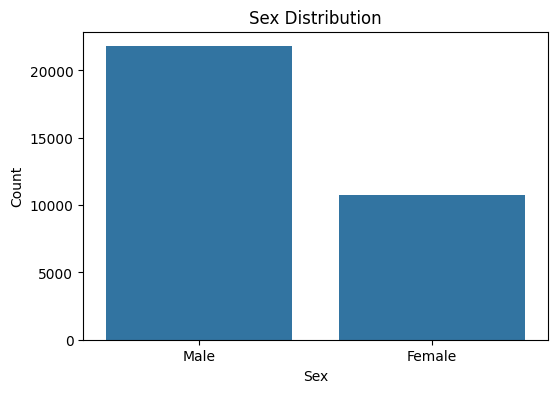

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="sex")
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


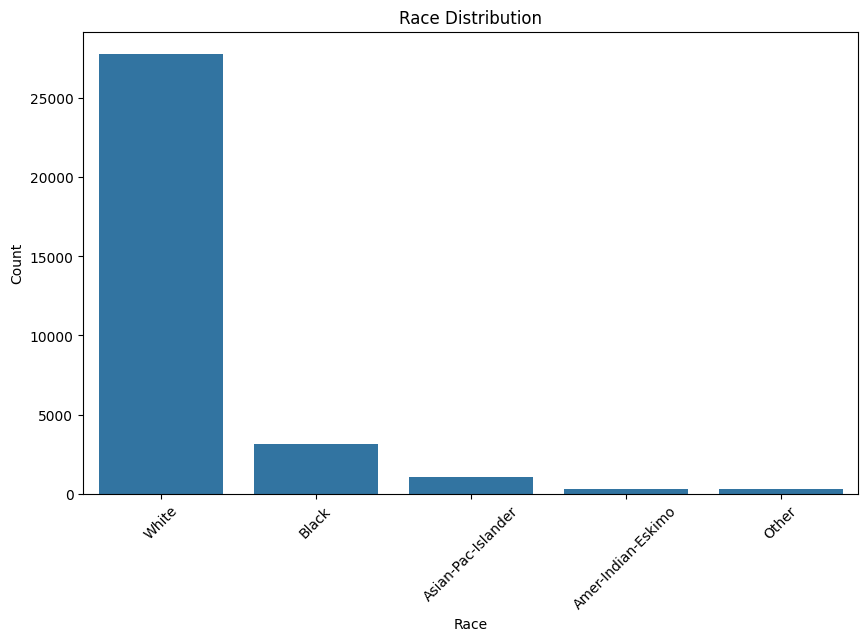

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="race")
plt.title("Race Distribution")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [ ]:
le = LabelEncoder()

# Encode categorical columns (e.g., 'sex', 'race', and 'income')
df["sex"] = le.fit_transform(df["sex"])
df["race"] = le.fit_transform(df["race"])
df["income"] = le.fit_transform(df["income"])


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder
le = LabelEncoder()

# Apply label encoding to categorical columns
df["workclass"] = le.fit_transform(df["workclass"])
df["education"] = le.fit_transform(df["education"])
df["marital-status"] = le.fit_transform(df["marital-status"])
df["occupation"] = le.fit_transform(df["occupation"])
df["relationship"] = le.fit_transform(df["relationship"])
df["race"] = le.fit_transform(df["race"])
df["sex"] = le.fit_transform(df["sex"])
df["native-country"] = le.fit_transform(df["native-country"])
df["income"] = le.fit_transform(df["income"])


In [ ]:
# Separate features and target variable
X = df.drop("income", axis=1)
y = df["income"]  # Target variable is 'income'

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.dtypes)

# Check for missing values in the training data
print(X_train.isnull().sum())


age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
dtype: object
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64


In [ ]:
# Handle missing values (fill with the median or mode)
X_train = X_train.fillna(X_train.median())  # Example: filling missing values with the median


In [ ]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
print(X_train.shape)
print(y_train.shape)


(26048, 14)
(26048,)


In [ ]:
model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report (includes precision, recall, F1-score)
print(classification_report(y_test, y_pred))


Accuracy: 0.8082
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4942
           1       0.68      0.38      0.49      1571

    accuracy                           0.81      6513
   macro avg       0.76      0.66      0.69      6513
weighted avg       0.79      0.81      0.79      6513



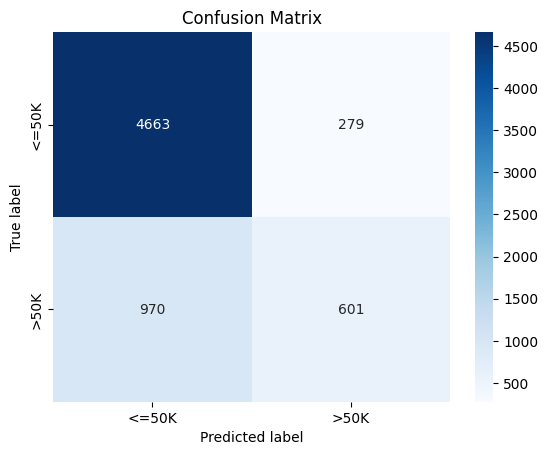

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import fairness_indicators
print(dir(fairness_indicators))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'version']


In [ ]:
!pip install aif360


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 5.5 MB/s eta 0:00:00


In [ ]:
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric

# Prepare your data (make sure the features and labels are correctly formatted)
dataset = BinaryLabelDataset(df=pd.concat([X_test, y_test], axis=1), label_names=['income'], protected_attribute_names=['sex'])

# Define the privileged and unprivileged groups (male as privileged, female as unprivileged)
privileged_groups = [{'sex': 1}]  # Male
unprivileged_groups = [{'sex': 0}]  # Female

# Compute fairness metrics
metric = BinaryLabelDatasetMetric(dataset, privileged_groups=privileged_groups, unprivileged_groups=unprivileged_groups)

# Print the fairness metrics
print(f"Disparate Impact: {metric.disparate_impact()}")
print(f"Mean Difference: {metric.mean_difference()}")


Disparate Impact: 0.35933885680457067
Mean Difference: -0.1953965374049429


In [ ]:
!pip install 'aif360[Reweighing]'


In [ ]:
from aif360.algorithms.preprocessing import Reweighing

# Apply Reweighing method to the dataset
RW = Reweighing(privileged_groups=privileged_groups, unprivileged_groups=unprivileged_groups)
dataset_transf = RW.fit_transform(dataset)

# Check the fairness metrics after reweighing
metric_transf = BinaryLabelDatasetMetric(dataset_transf, privileged_groups=privileged_groups, unprivileged_groups=unprivileged_groups)
print(f"Disparate Impact after Reweighing: {metric_transf.disparate_impact()}")
print(f"Mean Difference after Reweighing: {metric_transf.mean_difference()}")


Disparate Impact after Reweighing: 0.9999999999999998
Mean Difference after Reweighing: -5.551115123125783e-17


In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set before mitigation
y_pred_before = model.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred_before)

# Make predictions on the transformed dataset after mitigation
y_pred_after = model.predict(X_test)
accuracy_after = accuracy_score(y_test, y_pred_after)

# Print the results
print(f"Accuracy before mitigation: {accuracy_before}")
print(f"Accuracy after mitigation: {accuracy_after}")

# Compare fairness metrics before and after mitigation
print(f"Disparate Impact before mitigation: {metric.disparate_impact()}")
print(f"Disparate Impact after mitigation: {metric_transf.disparate_impact()}")
print(f"Mean Difference before mitigation: {metric.mean_difference()}")
print(f"Mean Difference after mitigation: {metric_transf.mean_difference()}")


Accuracy before mitigation: 0.8082296944572394
Accuracy after mitigation: 0.8082296944572394
Disparate Impact before mitigation: 0.35933885680457067
Disparate Impact after mitigation: 0.9999999999999998
Mean Difference before mitigation: -0.1953965374049429
Mean Difference after mitigation: -5.551115123125783e-17
